# 面积分

面积分一般步骤：
- 绘图
- 定义矢量场
- 定义积分面
- 变量代换，求出积分面的微元以及变换后的矢量场
- 求出矢量场再面积微元法向的投影作为被积函数

矢量场：


N.y*N.j

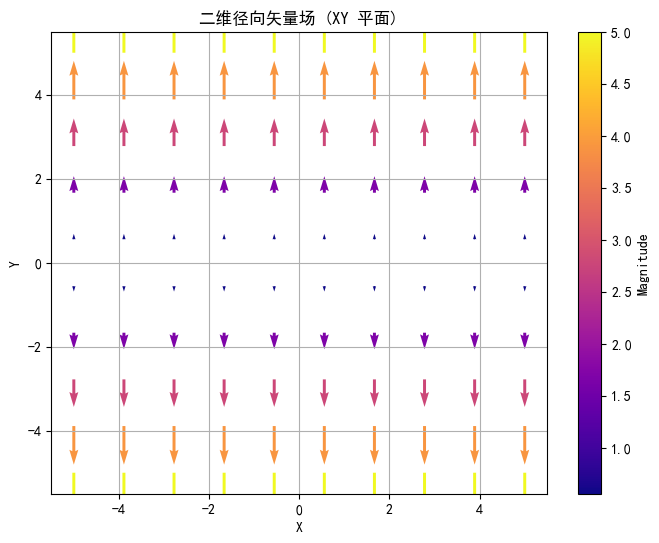

In [4]:
import numpy as np
import sympy as sp
from sympy.vector import CoordSys3D
from IPython.display import display

import matplotlib.pyplot as plt
from matplotlib import rcParams
# 设置字体，防止中文乱码
rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
rcParams['axes.unicode_minus'] = False    # 解决负号无法正常显示的问题

# 定义矢量场函数
def vector_field(x_vals, y_vals, z_vals):
    
    # 创建一个三维坐标系
    N = CoordSys3D('N')
    # 定义矢量场
    A = N.y * N.j
    print('矢量场：')
    display(A)
    
    # 提取矢量场 A 在 x, y, z 方向的分量
    Ax = A & N.i
    Ay = A & N.j
    Az = A & N.k
    # 计算 x, y, z 方向的分量
    A_x = np.zeros_like(x_vals, dtype=float)
    A_y = np.zeros_like(y_vals, dtype=float)
    A_z = np.zeros_like(z_vals, dtype=float)
    
    for i in range(x_vals.shape[0]):
        for j in range(x_vals.shape[1]):
            for k in range(x_vals.shape[2]):
                A_x[i, j, k] = float(Ax.subs({N.x: x_vals[i, j, k], N.y: y_vals[i, j, k], N.z: z_vals[i, j, k]}))
                A_y[i, j, k] = float(Ay.subs({N.x: x_vals[i, j, k], N.y: y_vals[i, j, k], N.z: z_vals[i, j, k]}))
                A_z[i, j, k] = float(Az.subs({N.x: x_vals[i, j, k], N.y: y_vals[i, j, k], N.z: z_vals[i, j, k]}))
    return A_x, A_y, A_z

# 创建网格点
x = np.linspace(-5, 5, 10)
y = np.linspace(-5, 5, 10)
z = np.linspace(1, 1, 1)
X, Y, Z = np.meshgrid(x, y, z)

# 计算每个网格点的矢量场分量
A_x, A_y, A_z = vector_field(X, Y, Z)

# 绘制矢量场
plt.figure(figsize=(8, 6))
plt.quiver(X[:, :, 0], Y[:, :, 0], A_x[:, :, 0], A_y[:, :, 0], np.sqrt(A_x[:, :, 0]**2 + A_y[:, :, 0]**2), cmap='plasma')
plt.colorbar(label='Magnitude')
plt.title('二维径向矢量场 (XY 平面)')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

In [ ]:
import sympy as sp
from sympy.vector import CoordSys3D, divergence
import numpy as np
from sympy import Function
from IPython.display import display
from IPython.display import HTML

# 创建一个三维坐标系
N = CoordSys3D('N')

# 定义向量场 A(x, y, z)
A = 0 *N.i + N.y * N.j + 0 * N.k

print('我们的向量场是：')
display(A)
print('向量场散度为')
div_A = divergence(A)
display(div_A)

我们的向量场是：


N.y*N.j

向量场散度为


1

In [34]:
# 定义积分面
R = sp.symbols('R')
print('积分面是一个球面，球心在原点，半径是 =', R)

# 将直角坐标转换为球坐标
r, theta, phi = sp.symbols('r theta phi')
# 面积微分元素为 R^2  sin\theta d\theta d\phi
area_element = R ** 2 * sp.sin(theta)
print('面积微分元素为：')
display(area_element)

# 定义面积分的法向量：径向向外
r_field_hat = sp.sin(theta) * sp.cos(phi) * N.i + sp.sin(theta) * sp.sin(phi) * N.j + sp.cos(phi) * N.k
print('面积分的法向量为：')
display(r_field_hat)

# 在球坐标中表示向量场
A_polar = A.subs({N.x: R * sp.sin(theta) * sp.cos(phi), N.y: R * sp.sin(theta) * sp.sin(phi), N.z: R * sp.cos(theta)})
print('面积微元处，场的代表向量为：')
display(A_polar)

# 输出积分表达式，不计算
integral_expr = area_element * (A_polar & r_field_hat)
print("积分表达式:")
display(integral_expr)

print("对theta求原函数:")
display(sp.integrate(integral_expr, theta))
print("对theta求积分:")
integral_expr = sp.integrate(integral_expr, (theta,0,sp.pi))
display(integral_expr)

print("对phi求原函数:")
display(sp.integrate(integral_expr, phi))
print("对phi求积分:")
area_integral = sp.integrate(integral_expr, (phi,0,2*sp.pi))
display(area_integral)


# 计算单位圆内的面积分，theta 的范围是 0 到 pi，phi 的范围是 0 到 2pi
area_integral = sp.integrate(area_element * (A_polar & r_field_hat) , (theta, 0, sp.pi), (phi, 0, 2 * sp.pi))

# 输出面积分结果
print("或者直接求面积分:")
display(area_integral)

积分面是一个球面，球心在原点，半径是 = R
面积微分元素为：


R**2*sin(theta)

面积分的法向量为：


(sin(theta)*cos(phi))*N.i + (sin(phi)*sin(theta))*N.j + (cos(phi))*N.k

面积微元处，场的代表向量为：


(R*sin(phi)*sin(theta))*N.j

积分表达式:


R**3*sin(phi)**2*sin(theta)**3

对theta求原函数:


R**3*(cos(theta)**3/3 - cos(theta))*sin(phi)**2

对theta求积分:


4*R**3*sin(phi)**2/3

对phi求原函数:


4*R**3*(phi/2 - sin(phi)*cos(phi)/2)/3

对phi求积分:


4*pi*R**3/3

或者直接求面积分:


4*pi*R**3/3